In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [38]:
df = pd.read_csv("train.csv")

In [39]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
print("Id of houses : {}".format(len(df.Id)))

Id of houses : 1460


In [11]:
def check_missing_value(df):
    missing_features=[]
    for i in df.columns:
        temp = df[i].isnull().sum()
        if temp!=0:
            print(i," feature has ",temp," missing value")
            missing_features.append(i)
    return missing_features

def check_features_datatype(df):
    categorical_feature = [i  for i in df.columns if df[i].dtype == 'O']
    numerical_feature = [i  for i in df.columns if df[i].dtype!= 'O']
    return categorical_feature,numerical_feature

def _check_datatype_is_string(df,feature):
    if df[feature] == 'O':
        return True
    else:
        return False
    

In [12]:
categorical_features , numerical_features = check_features_datatype(df)


In [13]:
print("Features where year is involved : ")
year_feature =[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]
year_feature

Features where year is involved : 


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs yearsold')

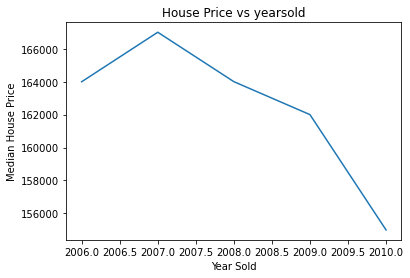

In [14]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs yearsold")

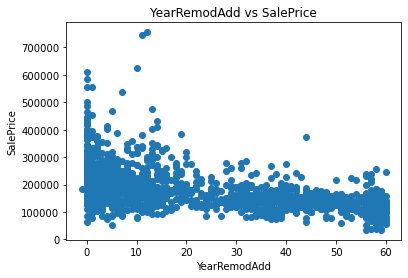

In [15]:
for feature in year_feature:
    if feature != 'YrSold':
        data=df.copy()
        
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title("{} vs SalePrice".format(feature))
        plt.show()

In [16]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())< 25 and feature not in year_feature + ['Id']]

print("Discrete Variables Count : {}".format(len(discrete_feature)))

Discrete Variables Count : 17


In [17]:
df[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Variables count : {}".format(len(continuous_feature)))

Continuous Variables count : 16


In [19]:
df[continuous_feature].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

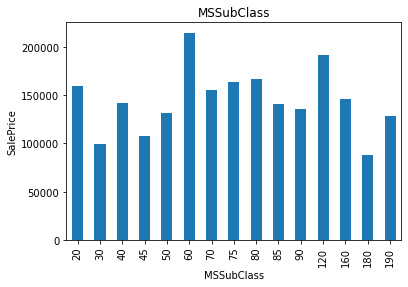

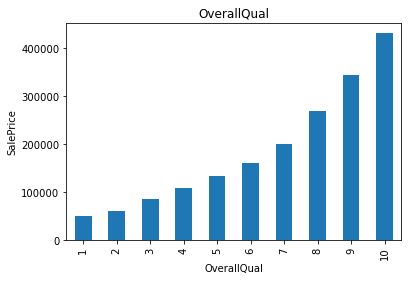

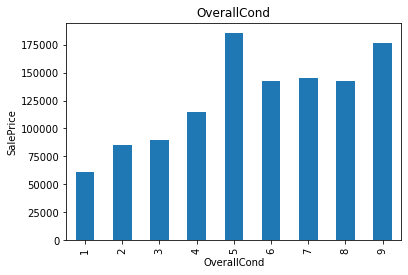

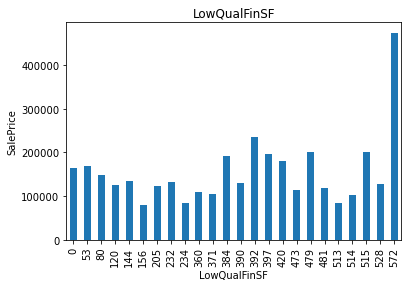

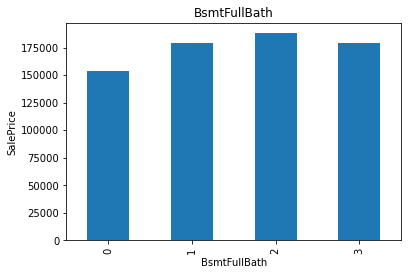

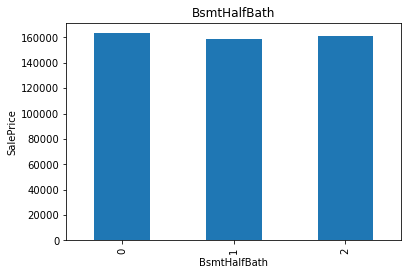

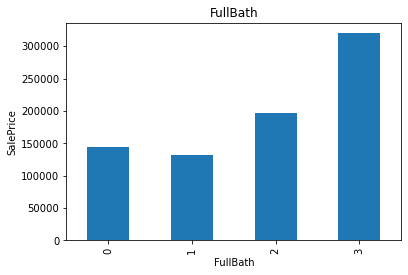

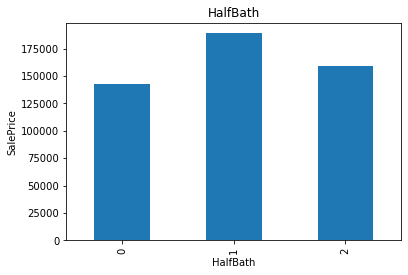

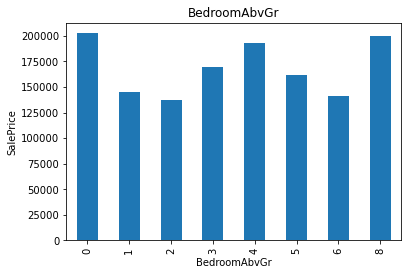

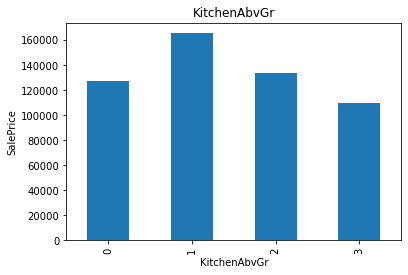

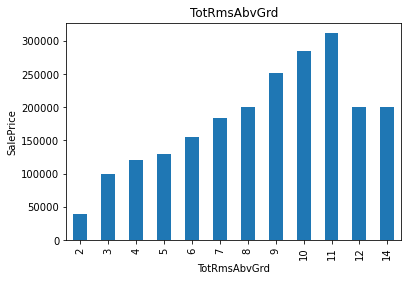

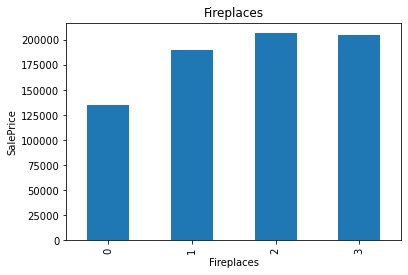

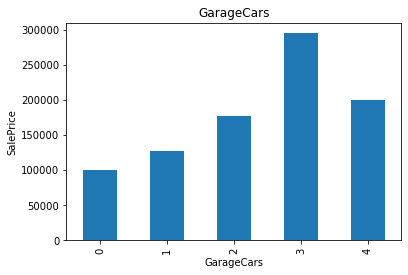

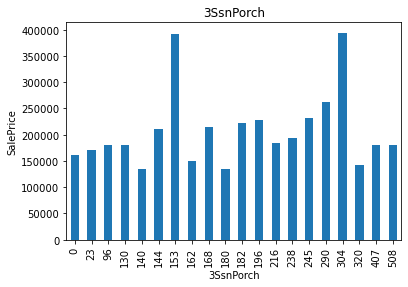

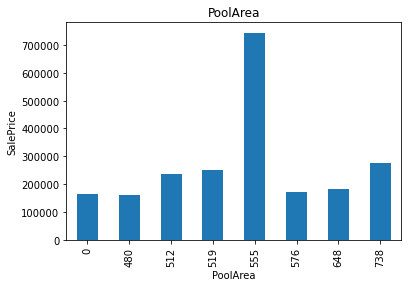

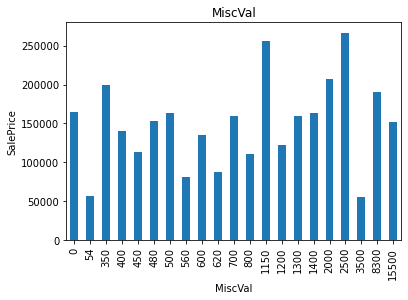

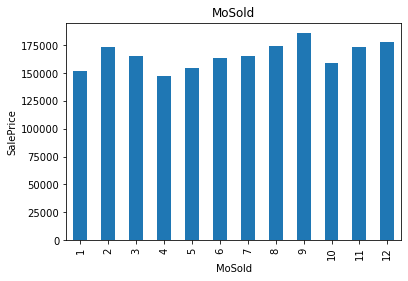

In [20]:
for feature in discrete_feature:
    data=df.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


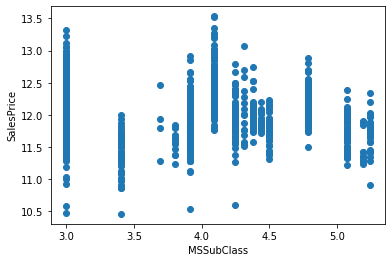

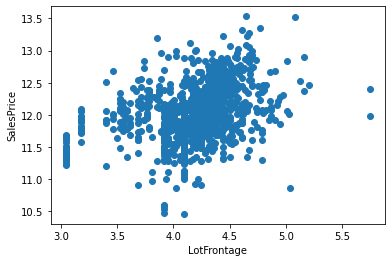

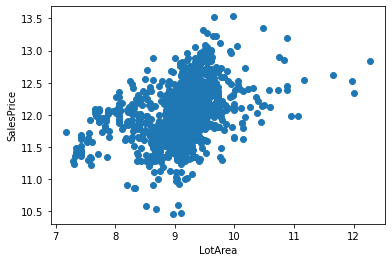

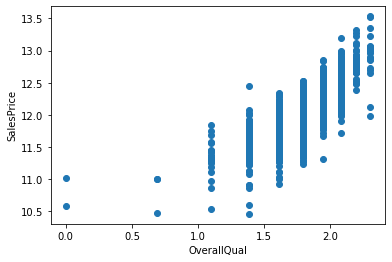

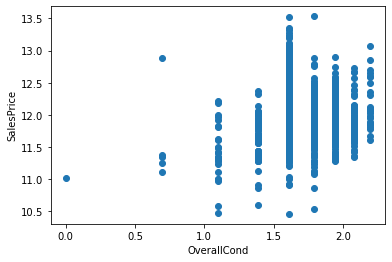

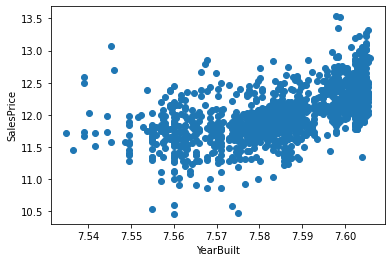

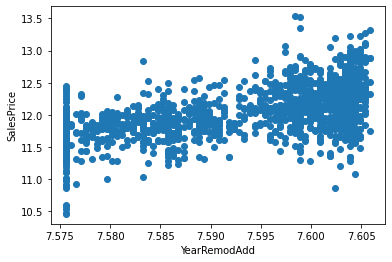

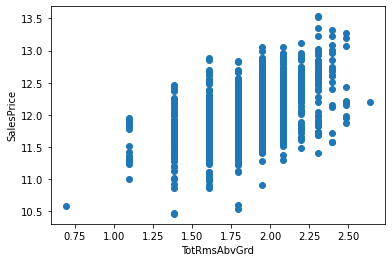

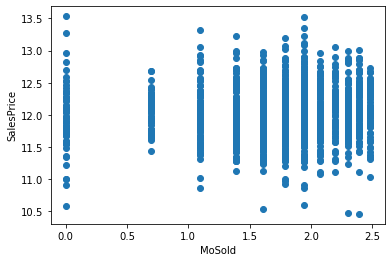

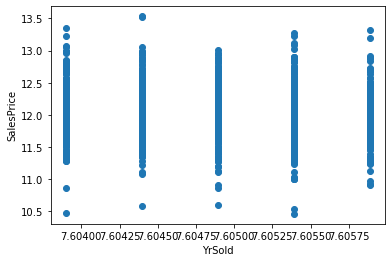

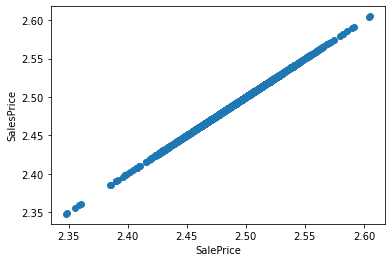

In [21]:
for feature in numerical_features:
    data =df.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalesPrice")
        plt.show()

In [22]:
missing_features=check_missing_value(df)

LotFrontage  feature has  259  missing value
Alley  feature has  1369  missing value
MasVnrType  feature has  8  missing value
MasVnrArea  feature has  8  missing value
BsmtQual  feature has  37  missing value
BsmtCond  feature has  37  missing value
BsmtExposure  feature has  38  missing value
BsmtFinType1  feature has  37  missing value
BsmtFinType2  feature has  38  missing value
Electrical  feature has  1  missing value
FireplaceQu  feature has  690  missing value
GarageType  feature has  81  missing value
GarageYrBlt  feature has  81  missing value
GarageFinish  feature has  81  missing value
GarageQual  feature has  81  missing value
GarageCond  feature has  81  missing value
PoolQC  feature has  1453  missing value
Fence  feature has  1179  missing value
MiscFeature  feature has  1406  missing value


In [23]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

The feature is MSZoning and the number of categories are 5
The feature is Street and the number of categories are 2
The feature is Alley and the number of categories are 3
The feature is LotShape and the number of categories are 4
The feature is LandContour and the number of categories are 4
The feature is Utilities and the number of categories are 2
The feature is LotConfig and the number of categories are 5
The feature is LandSlope and the number of categories are 3
The feature is Neighborhood and the number of categories are 25
The feature is Condition1 and the number of categories are 9
The feature is Condition2 and the number of categories are 8
The feature is BldgType and the number of categories are 5
The feature is HouseStyle and the number of categories are 8
The feature is RoofStyle and the number of categories are 6
The feature is RoofMatl and the number of categories are 8
The feature is Exterior1st and the number of categories are 15
The feature is Exterior2nd and the numb

In [24]:
for i in missing_features:
    if i in numerical_features:
        temp=df[i].mean()
        df[i].fillna(temp,inplace=True)
    if i in categorical_features:
        temp=df[i].mode()[0]
        df[i].fillna(temp,inplace=True)

In [25]:
missing_features=check_missing_value(df)
print("Number of Features having missing values : ",len(missing_features))

Number of Features having missing values :  0


In [26]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          Gd   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [27]:
for i in categorical_features:
    dict={}
    count=1
    for j in df[i].unique():
        dict[j]=count
        count+=1
    df[i]=df[i].map(dict)

In [28]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         1         65.0     8450       1      1         1   
1   2          20         1         80.0     9600       1      1         1   
2   3          60         1         68.0    11250       1      1         2   
3   4          70         1         60.0     9550       1      1         2   
4   5          60         1         84.0    14260       1      1         2   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          1          1             1           1   
1            1          1          2          1             2           2   
2            1          1          1          1             1           1   
3            1          1          3          1             3           1   
4            1          1          2          1             4           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         1           1            7            5       2003   
1           1         1           2            6            8       1976   
2           1         1           1            7            5       2001   
3           1         1           1            7            5       1915   
4           1         1           1            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1            1            1           1   
1          1976          1         1            2            2           2   
2          2002          1         1            1            1           1   
3          1970          1         1            3            3           2   
4          2000          1         1            1            1           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          1          1           1         1         1   
1         0.0          2          1           2         1         1   
2       162.0          1          1           1         1         1   
3         0.0          2          1           3         2         2   
4       350.0          1          1           1         1         1   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             1         706             1           0   
1             2             2         978             1           0   
2             3             1         486             1           0   
3             1             2         216             1           0   
4             4             1         655             1           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          1           1           1   
1        284         1262        1          1           1           1   
2        434          920        1          1           1           1   
3        540          756        1          2           1           1   
4        490         1145        1          1           1           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            1             8   
1         2         0             3             1            2             6   
2         2         1             3             1            1             6   
3         1         0             3             1            1 

In [29]:
categorical_features , numerical_features = check_features_datatype(df)
print("Number of Categorical features : ",len(categorical_features))

Number of Categorical features :  0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = df.drop(['SalePrice'],axis=1)
y=df['SalePrice']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
lr = LinearRegression()
lr.fit(x_train , y_train)
pred = lr.predict(x_test)
print(r2_score(pred , y_test))

0.7650632865773281
